In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('./las_data_07052025.csv')

In [3]:
df.describe()

,DIFFRACTION_ALL,INVERSION_AI,FAULTS,VREZY,TOLSCHI,FUNDAMENT,PROVODKA,DH_B_R0,DIFFRACTION_ALL_SM,MAX_DIFFRACTION,...,STACK_MINUS_MIN_DIFFRACTION,STACK_MULT_MAX_DIFFRACTION,STACK_MULT_MIN_DIFFRACTION,PERV,INVERSION_AI_COLL,THICKNESS_R0_R4,RMS_AMPLITUDE,FAULTS_PROBABILITY,FAULTS_AND_FAULTS_PROBABILITY,WELL
count,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,...,4901.000000,4901.000000,4901.000000,4873.000000,4901.000000,4901.000000,4.901000e+03,4901.000000,4901.000000,4972.000000
mean,1.736075,18291.985807,931.004511,1747.983385,1347.736570,11973.162096,73.488504,200.418084,1.756749,3.940175,...,13.583504,7.316650,0.596189,6.607442,18439.073464,349.419200,5.554998e+06,489.547263,338.184504,29.715607
std,0.462566,2209.110904,691.673935,1557.391480,1242.008772,3735.625794,24.508393,14.526581,0.222432,1.232799,...,3.574316,4.013755,0.629309,1.728981,1530.791460,167.529644,7.979696e+06,479.786909,335.506074,17.348638
min,0.576553,0.000000,5.954316,0.000000,11.068332,2642.927246,-6.234059,172.162231,1.058805,1.205502,...,4.592951,0.818420,-0.052377,0.627867,15000.000000,95.546898,0.000000e+00,7.913165,6.474114,0.000000
25%,1.413965,17453.275391,350.012695,313.550537,301.318268,9697.782227,57.980930,190.498688,1.625531,3.091492,...,11.085872,4.508907,0.236024,5.412459,17410.333984,232.610779,9.479224e+05,92.424637,66.530807,15.000000
50%,1.689885,18442.767578,821.722534,1385.240845,1060.234985,11481.564453,81.463768,197.375092,1.739743,3.750525,...,13.231171,6.443330,0.431567,6.495466,18482.599609,322.314911,3.073786e+06,365.034515,202.059082,30.000000
75%,2.023088,19393.230469,1302.061890,2987.791992,1841.347900,14022.536133,92.271515,206.041107,1.885058,4.611557,...,15.802708,9.229954,0.754146,7.781390,19400.466797,432.189362,6.775250e+06,725.312317,560.677002,43.000000
max,4.035190,23773.076172,3189.070801,5321.745117,4820.676758,35472.953125,111.204109,257.692749,2.789323,11.154594,...,31.205990,30.849874,9.603401,11.785281,23803.951172,1039.263428,8.554933e+07,2585.243164,1609.672119,65.000000


In [4]:
df.isnull().sum()

DIFFRACTION_ALL                  71
INVERSION_AI                     71
FAULTS                           71
VREZY                            71
TOLSCHI                          71
FUNDAMENT                        71
PROVODKA                         71
DH_B_R0                          71
DIFFRACTION_ALL_SM               71
MAX_DIFFRACTION                  71
MIN_DIFFRACTION                  71
STACK_MINUS_MAX_DIFFRACTION      71
STACK_MINUS_MIN_DIFFRACTION      71
STACK_MULT_MAX_DIFFRACTION       71
STACK_MULT_MIN_DIFFRACTION       71
PERV                             99
INVERSION_AI_COLL                71
THICKNESS_R0_R4                  71
RMS_AMPLITUDE                    71
FAULTS_PROBABILITY               71
FAULTS_AND_FAULTS_PROBABILITY    71
WELL                              0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

DIFFRACTION_ALL                  0
INVERSION_AI                     0
FAULTS                           0
VREZY                            0
TOLSCHI                          0
FUNDAMENT                        0
PROVODKA                         0
DH_B_R0                          0
DIFFRACTION_ALL_SM               0
MAX_DIFFRACTION                  0
MIN_DIFFRACTION                  0
STACK_MINUS_MAX_DIFFRACTION      0
STACK_MINUS_MIN_DIFFRACTION      0
STACK_MULT_MAX_DIFFRACTION       0
STACK_MULT_MIN_DIFFRACTION       0
PERV                             0
INVERSION_AI_COLL                0
THICKNESS_R0_R4                  0
RMS_AMPLITUDE                    0
FAULTS_PROBABILITY               0
FAULTS_AND_FAULTS_PROBABILITY    0
WELL                             0
dtype: int64

In [7]:
df.columns = df.columns.str.strip()
agg_df = df.groupby("WELL").mean().reset_index()

In [8]:
agg_df

,WELL,DIFFRACTION_ALL,INVERSION_AI,FAULTS,VREZY,TOLSCHI,FUNDAMENT,PROVODKA,DH_B_R0,DIFFRACTION_ALL_SM,...,STACK_MINUS_MAX_DIFFRACTION,STACK_MINUS_MIN_DIFFRACTION,STACK_MULT_MAX_DIFFRACTION,STACK_MULT_MIN_DIFFRACTION,PERV,INVERSION_AI_COLL,THICKNESS_R0_R4,RMS_AMPLITUDE,FAULTS_PROBABILITY,FAULTS_AND_FAULTS_PROBABILITY
0,0,1.726944,18871.603048,1784.722571,5137.489024,1074.458938,10929.260040,92.730697,184.755212,1.819493,...,9.964956,13.577006,7.039500,0.472026,7.838880,18873.332499,253.343874,1.128155e+06,578.005419,578.005419
1,1,1.556441,19908.616368,572.229264,3893.412073,95.185720,10996.003508,99.649489,185.618617,1.576014,...,9.045573,12.113693,5.684345,0.643530,8.261757,19911.151162,325.272351,2.004943e+07,617.354208,566.100478
2,2,1.802333,19441.215246,901.559571,2601.471673,1525.866699,9504.978458,94.007302,194.619578,1.731091,...,10.325116,14.025877,7.570463,0.794551,5.504219,19486.352003,242.537654,4.732972e+06,125.108109,125.108109
3,3,1.535240,17878.802379,1535.469406,3783.868610,392.015221,12019.797131,91.870099,191.514970,1.576343,...,9.014905,11.990250,5.254810,0.504686,7.870949,17867.100497,307.649273,6.008572e+05,106.418700,106.418700
4,4,1.605984,16795.815059,1140.524668,3399.860901,1749.565104,8993.340166,95.371591,191.022416,1.631472,...,8.802392,12.579260,6.800868,0.459591,5.476790,16803.635547,279.611173,2.000715e+07,74.756832,74.756832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,1.976952,17685.770717,866.721614,3431.988360,2455.535575,2777.563817,100.769545,190.626860,1.828115,...,11.599653,15.372494,8.608559,0.880112,4.426371,17680.124791,236.204897,1.875507e+06,835.580717,805.006971
61,62,1.805373,16932.034026,280.016043,4541.368190,3744.915669,5620.012695,95.757598,201.716391,1.702418,...,10.058955,14.029273,8.185082,0.880039,6.446869,16930.971012,215.752995,2.684667e+06,243.324522,228.801968
62,63,1.710279,22985.365234,2764.806458,708.575586,338.920761,3943.744402,110.017851,181.391998,1.414495,...,9.934389,13.440957,6.543849,0.507780,6.240561,22995.000000,890.356781,3.944949e+06,541.072860,541.072860
63,64,1.399810,18746.588362,120.585493,96.211196,697.848302,15428.360520,91.722298,203.249400,1.569306,...,8.696442,10.947618,3.869705,0.541817,3.824810,18755.753098,1020.288658,1.235757e+06,88.827535,82.504641


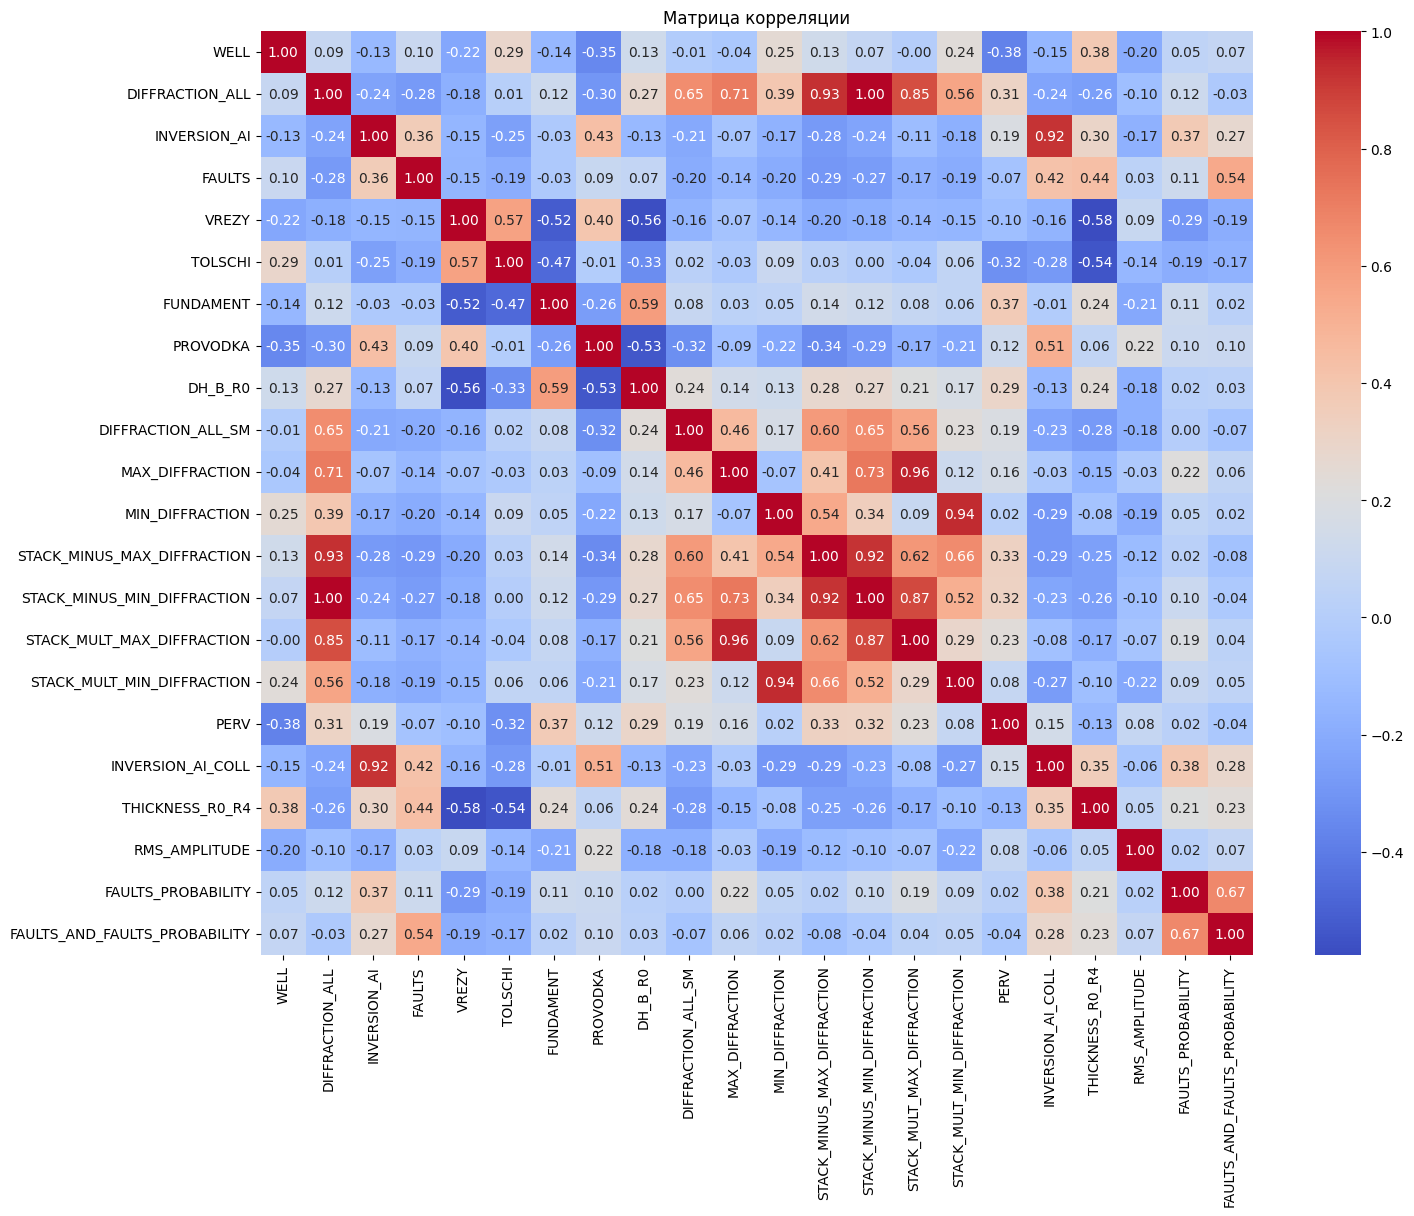

In [9]:
plt.figure(figsize=(16,12))
sns.heatmap(agg_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

удалю: 'INVERSION_AI', 'FAULTS', 'VREZY', 'TOLSCHI', 'FUNDAMENT', 'PROVODKA', 'DH_B_R0', 'MIN_DIFFRACTION', 'STACK_MULT_MIN_DIFFRACTION', 'INVERSION_AI_COLL', 'THICKNESS_R0_R4', 'RMS_AMPLITUDE', 'FAULTS_PROBABILITY', 'FAULTS_AND_FAULTS_PROBABILITY'ILITY    0 да

In [10]:
X = agg_df[['DIFFRACTION_ALL','INVERSION_AI','TOLSCHI', 'FUNDAMENT', 'THICKNESS_R0_R4','PERV']]
y = agg_df['P32_ALL']

KeyError: 'P32_ALL'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Вариант с авоматическим подбором гиперпараметра

In [ ]:
ridge_params = {'alpha':[0.1, 1.0, 10.0, 100.0]}
ridge = GridSearchCV(Ridge(), ridge_params, cv= 3)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge_test = ridge.predict(X_test_scaled)
y_pred_ridge_train = ridge.predict(X_train_scaled)
cv_ridge = cross_val_score(ridge.best_estimator_, X_train_scaled, y_train, cv=3)

In [ ]:
print(ridge.best_params_)

In [ ]:
print("===Ridge Regression===")
print("CV R2 scores:", cv_ridge)
print("CV R2 mean:", cv_ridge.mean())
print("MSE test:", mean_squared_error(y_test,y_pred_ridge_test))
print("R2 test:", r2_score(y_test, y_pred_ridge_test))
print("MSE train:", mean_squared_error(y_train,y_pred_ridge_train))
print("R2 train:", r2_score(y_train,y_pred_ridge_train))

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_ridge_test, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Ridge')
plt.xlabel('Действительность')
plt.ylabel('Предсказания')

# Вариант с ручным подбором гиперпараметра

In [ ]:
ridge_params = {'alpha':[0.1]}
ridge = GridSearchCV(Ridge(), ridge_params, cv= 3)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge_test = ridge.predict(X_test_scaled)
y_pred_ridge_train = ridge.predict(X_train_scaled)
cv_ridge = cross_val_score(ridge.best_estimator_, X_train_scaled, y_train, cv=3)

In [ ]:
print(ridge.best_params_)

In [ ]:
print("===Ridge Regression===")
print("CV R2 scores:", cv_ridge)
print("CV R2 mean:", cv_ridge.mean())
print("MSE test:", mean_squared_error(y_test,y_pred_ridge_test))
print("R2 test:", r2_score(y_test, y_pred_ridge_test))
print("MSE train:", mean_squared_error(y_train,y_pred_ridge_train))
print("R2 train:", r2_score(y_train,y_pred_ridge_train))

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_ridge_test, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Ridge')
plt.xlabel('Действительность')
plt.ylabel('Предсказания')